In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Вводим дополнительные надстройки
warnings.filterwarnings('ignore')
# Устанавливаем дополнительные настройки отображения данных в таблице (округление чисел до двух знаков после запятой)
pd.set_option('display.float_format', '{:.2f}'.format)
# Задаём стиль отрисовки графиков
plt.style.use('seaborn-dark')

## Задание 1.
На листах 1 и 2 приведены данные по абонентской базе и выручке.

Необходимо рассчитать среднюю выручку от активного абонента по сегменту B2B в разрезе филиалов, показать помесячную динамику. Выручка должна быть указана в руб. без НДС на одного абонента.

In [2]:
subscriber_base = pd.read_excel('Тестовое задание аналитика.xlsx', sheet_name='Лист1')
subscriber_base.head()

,Месяц (YYYYMM),Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт."
0,201701,Дальневосточный филиал,Амурская область,B2B,13590
1,201701,Дальневосточный филиал,Амурская область,B2C,238181
2,201701,Дальневосточный филиал,Амурская область,B2G,9455
3,201701,Дальневосточный филиал,Амурская область,B2O,0
4,201701,Дальневосточный филиал,Еврейская АО,B2B,6444


In [3]:
# Информация по абонентской базе
subscriber_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Месяц (YYYYMM)                                   1934 non-null   int64 
 1   Филиал                                           1934 non-null   object
 2   Регион клиента (Hyperion)                        1828 non-null   object
 3   Сегмент рынка                                    1844 non-null   object
 4   Кол-во активных абонентов на конец периода, шт.  1934 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 75.7+ KB


In [4]:
revenue_subscribers = pd.read_excel('Тестовое задание аналитика.xlsx', sheet_name='Лист2')
revenue_subscribers.head()

,Месяц (YYYYMM),Филиал,Сегмент рынка,"Выручка, тыс руб., без НДС"
0,201701,Дальневосточный филиал,B2B,54949.08
1,201701,Дальневосточный филиал,B2C,1023969.75
2,201701,Дальневосточный филиал,B2G,21139.21
3,201701,Дальневосточный филиал,B2O,0.39
4,201701,Кавказский филиал,B2B,89872.08


In [5]:
# Информация по выручке от абонентов
revenue_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Месяц (YYYYMM)              201 non-null    int64  
 1   Филиал                      201 non-null    object 
 2   Сегмент рынка               189 non-null    object 
 3   Выручка, тыс руб., без НДС  201 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB


Видим следующие проблемы в данных: столбец с месяцем представлен в виде целого числа в обоих датасетах

Перед тем, как начать исследование, необходимо исправить эти недочёты, чтобы можно было корректно анализировать данные.

In [6]:
# Исправляем тип данных в столбцах с датой (также рабочий метод)
subscriber_base['Месяц (YYYYMM)'] = pd.to_datetime(subscriber_base['Месяц (YYYYMM)'], format='%Y%m')
revenue_subscribers['Месяц (YYYYMM)'] = pd.to_datetime(revenue_subscribers['Месяц (YYYYMM)'], format='%Y%m')

Теперь нужно проверить то, как отработали методы по предобработке данных

In [7]:
subscriber_base.head()

,Месяц (YYYYMM),Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт."
0,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590
1,2017-01-01,Дальневосточный филиал,Амурская область,B2C,238181
2,2017-01-01,Дальневосточный филиал,Амурская область,B2G,9455
3,2017-01-01,Дальневосточный филиал,Амурская область,B2O,0
4,2017-01-01,Дальневосточный филиал,Еврейская АО,B2B,6444


In [8]:
revenue_subscribers.head()

,Месяц (YYYYMM),Филиал,Сегмент рынка,"Выручка, тыс руб., без НДС"
0,2017-01-01,Дальневосточный филиал,B2B,54949.08
1,2017-01-01,Дальневосточный филиал,B2C,1023969.75
2,2017-01-01,Дальневосточный филиал,B2G,21139.21
3,2017-01-01,Дальневосточный филиал,B2O,0.39
4,2017-01-01,Кавказский филиал,B2B,89872.08


Далее посмотрим на столбец с месяцем, за одинаковый ли период даны данные и совпадают ли эти значения. Если да, то можно соединить две таблицы именно по этому полю.

In [9]:
subscriber_base['Месяц (YYYYMM)'].unique()

array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [10]:
revenue_subscribers['Месяц (YYYYMM)'].unique()

array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

На данном этапе необходимо соединить два датасета в один, чтобы можно было уже приступить к исследованию данных. Видим, что данные по месяцам абсолютно одинаковы, можем соединить именно по этому столбцу. Однако, при таком соединении, получится слишком много записей. 

Также, стоит заметить, что в таблицах нет первичного и вторичного ключей, по которым можно было бы их соединить, поэтому сджойним по двум полям: `Филиал` и `Сегмент рынка`, а не по какому-то одному из них, во избежании дубликатов и помноженных лишних записей. 

In [11]:
# Получаем итоговый датасет
total_df = subscriber_base.merge(revenue_subscribers, on=['Филиал', 'Сегмент рынка'], how='left')
total_df.head()

,Месяц (YYYYMM)_x,Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт.",Месяц (YYYYMM)_y,"Выручка, тыс руб., без НДС"
0,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-01-01,54949.08
1,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-02-01,52572.03
2,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-03-01,56091.22
3,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-04-01,53383.59
4,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-05-01,54386.30


In [12]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11595 entries, 0 to 11594
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Месяц (YYYYMM)_x                                 11595 non-null  datetime64[ns]
 1   Филиал                                           11595 non-null  object        
 2   Регион клиента (Hyperion)                        10959 non-null  object        
 3   Сегмент рынка                                    11055 non-null  object        
 4   Кол-во активных абонентов на конец периода, шт.  11595 non-null  int64         
 5   Месяц (YYYYMM)_y                                 11595 non-null  datetime64[ns]
 6   Выручка, тыс руб., без НДС                       11595 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 724.7+ KB


Видим, что соединение таблиц произвелось корректным образом.

In [13]:
# Срезаем данные по нужному нам сегменту
b2b_df = total_df[total_df['Сегмент рынка'] == 'B2B']
b2b_df.head()

,Месяц (YYYYMM)_x,Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт.",Месяц (YYYYMM)_y,"Выручка, тыс руб., без НДС"
0,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-01-01,54949.08
1,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-02-01,52572.03
2,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-03-01,56091.22
3,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-04-01,53383.59
4,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-05-01,54386.30


Далее находим среднюю выручку на одного активного абонента. Для этого необходимо поделить показатель выручки на количество активных абонентов на конец периода.

In [14]:
# Переводим выручку из тыс. руб в рубли
b2b_df['Выручка, тыс руб., без НДС'] = b2b_df['Выручка, тыс руб., без НДС'] * 1000
b2b_df = b2b_df.rename(columns={'Выручка, тыс руб., без НДС': 'Выручка, руб., без НДС'})
b2b_df.head()

,Месяц (YYYYMM)_x,Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт.",Месяц (YYYYMM)_y,"Выручка, руб., без НДС"
0,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-01-01,54949082.82
1,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-02-01,52572027.00
2,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-03-01,56091217.18
3,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-04-01,53383593.95
4,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-05-01,54386295.67


Так как дальне шам необходимо будет посчитать динамику в разрезе филиалов, уберу из датасета `Столичный филиал`, потому что там большинство данных сильно отличаются от всех остальных. Возможно, данный столбец так сильно выделяется, потому что изначально там данные представлены в рублях, а может и совершены какие-то ошибки. 

Также стоит предположить, что данные в порядке, так как всё-таки филиал находится в столице и такие показатели для Москвы это вполне себе нормальное явяление, но, чтобы на графиках всё визуализировалось красиво, уберём из анализа информацию об этом филиале.

In [15]:
b2b_df = b2b_df[b2b_df['Филиал'] != 'Столичный филиал']

In [16]:
b2b_df['Средняя выручка на одного активного абонента, руб.'] = (b2b_df['Выручка, руб., без НДС'] / 
                                         b2b_df['Кол-во активных абонентов на конец периода, шт.']
                                         )
b2b_df.head()

,Месяц (YYYYMM)_x,Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт.",Месяц (YYYYMM)_y,"Выручка, руб., без НДС","Средняя выручка на одного активного абонента, руб."
0,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-01-01,54949082.82,4043.35
1,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-02-01,52572027.00,3868.43
2,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-03-01,56091217.18,4127.39
3,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-04-01,53383593.95,3928.15
4,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-05-01,54386295.67,4001.93


После того, как была найдена средняя выручка на одного активного абонента, необходимо посмотреть на помесячную динамику данной метрики в разрезе филиалов.

Однако, в сводной таблице будет найден медианный показатель по всем месяца, так как в данных есть сильно выбивающиеся значения, которые искажают данные, медиана будет отражать наиболее правдоподобную картину. По сути, поделив выручку на количество абонентов, мы нашли, сколько в среднем выручки приходится на одного пользователя. 

In [17]:
pivot_revenue = b2b_df.pivot_table(index='Филиал', columns='Месяц (YYYYMM)_x', 
                                   values='Средняя выручка на одного активного абонента, руб.', 
                                   aggfunc='median')
pivot_revenue

Месяц (YYYYMM)_x,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01
Филиал,,,,,,
Дальневосточный филиал,3929.74,3953.47,3919.61,3858.20,3853.21,3664.38
Кавказский филиал,8617.93,8619.90,8389.50,8170.36,8008.05,7801.86
Поволжский филиал,4857.52,4818.07,4757.76,4675.11,4621.97,4559.94
Северо-Западный филиал,10501.14,10414.52,10330.66,10221.84,10135.24,10034.57
Сибирский филиал,1885.62,1856.09,1802.55,1795.53,1783.26,1747.93
Уральский филиал,4245.87,4211.50,4140.03,4125.31,4156.08,3966.20
Центральный филиал,2822.80,2804.01,2745.24,2725.00,2687.46,2655.22


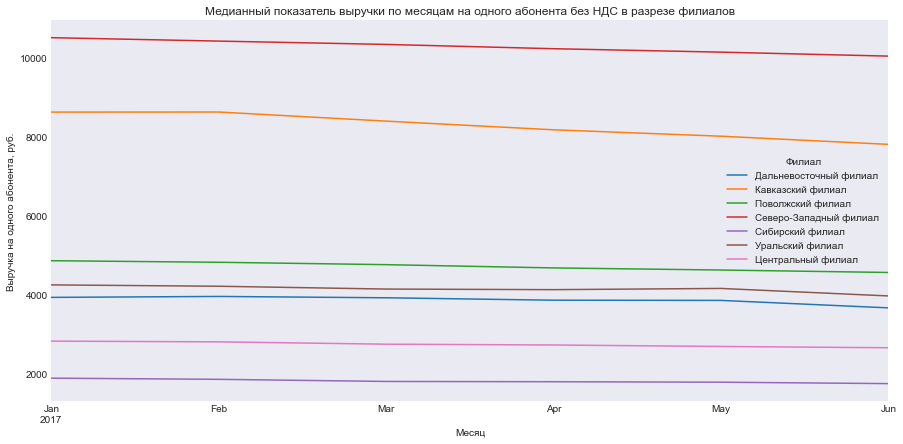

In [18]:
pivot_revenue.T.plot(figsize=(15, 7))
plt.title('Медианный показатель выручки по месяцам на одного абонента без НДС в разрезе филиалов')
plt.xlabel('Месяц')
plt.ylabel('Выручка на одного абонента, руб.')
plt.show()

## Итоговый вывод по 1 заданию

Анализируя помесячную динамику средней выручки от активного абонента по сегменту B2B в разрезе филиалов, можно сделать следующие выводы: 

1. Показатель выручки по всем филиалам на протяжение всего рассматриваемого периода стабильный и никаких колебаний по ней не наблюдается.
2. Наибольшая выручка на одного активного абонента представлена в Северо-Западном и Кавказском филиалах. Выручка остальных филиалов находится в диапазоне примерно от 2000 до 5000 рублей. 

## Задание 2. 
В таблице приведены данные по начислениям и интернет-трафику группы абонентов.
1. Посчитать затраты на трафик и маржинальность в разрезе типов устройств в абсолютных значениях и в %. Себестоимость 1 Мб трафика принять равной 1 коп.
2. Визуализировать на одном графике выручку, затраты и % GM по типам устройств.
3. Определить самую низкомаржинальную категорию среди типов устройств.

В таблице Excel предварительно был посчитан последний столбец с себестоимостью. Исходя из задания, себестоимость 1 Мб трафика равна 1 копейки, значит, чтобы найти затраты на трафик в рублях, необходимо значение трафика умножить на единицу и поделить на 100. 

In [19]:
data = pd.read_excel('Тестовое задание аналитика.xlsx', sheet_name='Задание 2', header=6)
data.head()

,Тип устройства,Название ТП,"Начисления, руб.","Трафик ПД, Мб","Себестоимость трафика, руб."
0,(пусто),МегаФон.Безлимит IVN,0.18,142999.19,1429.99
1,(пусто),КОРПОРАТИВНЫЙ СТАНДАРТ VIP,6.78,2408970.36,24089.70
2,SMARTPHONE,КОРПОРАТИВНЫЙ СТАНДАРТ VIP,0.73,160722.83,1607.23
3,TABLET,КОРПОРАТИВНЫЙ СТАНДАРТ VIP,0.29,56361.21,563.61
4,PHONE,Теплый прием 2016,1.27,85210.31,852.10


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Тип устройства               5837 non-null   object 
 1   Название ТП                  5837 non-null   object 
 2   Начисления, руб.             5837 non-null   float64
 3   Трафик ПД, Мб                5837 non-null   float64
 4   Себестоимость трафика, руб.  5837 non-null   float64
dtypes: float64(3), object(2)
memory usage: 228.1+ KB


Видим, что в данных нет пропусков, однако в таблице есть значения, которые, скорее всего, проставлялись специально. Значение `(пусто)` - из контекста задачи непонятно, с чем связан тот факт, что тип устройства не проставлялся, может быть, было найдено какое-то устройство, которого не было в базе или что-то ещё.

Также, стоит заметить, что в остальном в таблице никаких недочётов найдено не было, однако столбцы стоит ещё проверить на неявные дубликаты. 

In [21]:
data['Тип устройства'].value_counts()

SMARTPHONE        2048
USB MODEM         1054
TABLET             791
ROUTER             710
PHONE              440
UNDEFINED          315
(пусто)            273
DATA CARD          133
NETWORK DEVICE      73
Name: Тип устройства, dtype: int64

In [22]:
data['Название ТП'].value_counts()

Федеральный Специальный           238
МегаФон-Онлайн                    104
Корпоративный стандарт             97
МегаФон Онлайн Корпоративный       91
Включайся! Общайся                 83
                                 ... 
МФ-Все включ. L 2013 KOS            1
Включайся! Пиши MUR                 1
МегаФон-Всё вкл-ноS_ 2012 СИТИ      1
Включайся! Говори MUR               1
Единый                              1
Name: Название ТП, Length: 1143, dtype: int64

In [23]:
# Проверим числовые данные на наличие явных язъянов
data[['Начисления, руб.', 'Трафик ПД, Мб', 'Себестоимость трафика, руб.']].describe()

,"Начисления, руб.","Трафик ПД, Мб","Себестоимость трафика, руб."
count,5837.00,5837.00,5837.00
mean,50144.98,4938013.28,49380.13
std,281542.95,30851410.90,308514.11
min,-5808.77,50005.43,500.05
25%,1042.38,86936.65,869.37
50%,2766.95,233395.92,2333.96
75%,10921.42,976393.67,9763.94
max,7782760.86,950853503.03,9508535.03


Что касается категориальных данных, то значения `(пусто)` и `UNDEFINED` можно объединить и анализировать как одно целое, так как эти оба значения не определены. Во втором столбце видим много одиночных значений, и в целом, анализировать можно.

Если смотреть на числовые данные, то, во-первых, в данных наблюдается сильный разброс. Во-вторых, в первом столбце прослеживаются отрицательные и нулевые значения (можно предположить, что отрицательные -  это либо ошибка в данных и таких значений не должно было быть, либо это возврат средств за отмену операции; что касается нулевых - то, с высокой долей вероятности, это ошибки в данных). Необходимо будет проверить, сколько таких данных присутствует в таблице и уже принять решение о том, что с ними делать дальше. 

In [24]:
data[data['Начисления, руб.'] <= 0].shape[0]

48

Видим, что таких данных крайне мало в общем соотношении, следовательно, их можно просто удалить. 

In [25]:
# Срезаем данные и оставляем только те, что строго больше 0
data = data[data['Начисления, руб.'] > 0]

In [26]:
data.loc[data['Тип устройства'] == '(пусто)'] = 'UNDEFINED'

In [27]:
# Проверим, на сколько корректно отработал метод
data['Тип устройства'].value_counts()

SMARTPHONE        2041
USB MODEM         1043
TABLET             784
ROUTER             697
UNDEFINED          584
PHONE              437
DATA CARD          131
NETWORK DEVICE      72
Name: Тип устройства, dtype: int64

In [28]:
# Обработаем не числовых данных в столбцах с начислениями, трафиком и затратами
data['Начисления, руб.'] = pd.to_numeric(data['Начисления, руб.'], errors='coerce')
data['Трафик ПД, Мб'] = pd.to_numeric(data['Трафик ПД, Мб'], errors='coerce')
data['Себестоимость трафика, руб.'] = pd.to_numeric(data['Себестоимость трафика, руб.'], errors='coerce')

Замена прошла корректным образом. 

Далее необходимо поработать с аномалиями (посмотреть на распределение числовых данных и отсечь сильно выбивающиеся значения)

In [29]:
def viz_plot(column, range_param):
    plt.figure(figsize=(15, 7))
    data[column].plot(kind='hist', range=range_param, bins=50, title=f'Распределение для столбца "{column}"')

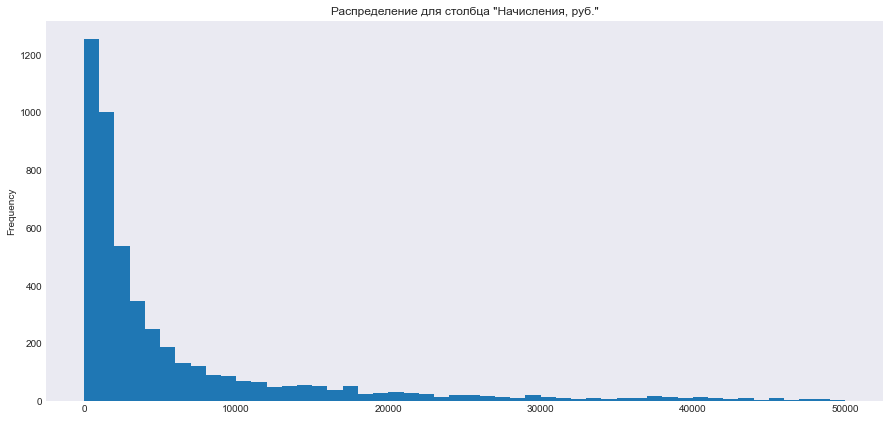

In [30]:
viz_plot('Начисления, руб.', (0, 50000))

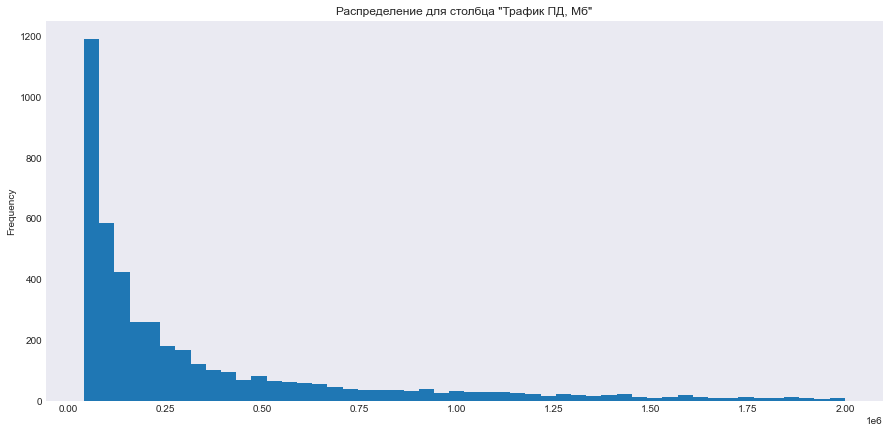

In [31]:
viz_plot('Трафик ПД, Мб', (40000, 2000000))

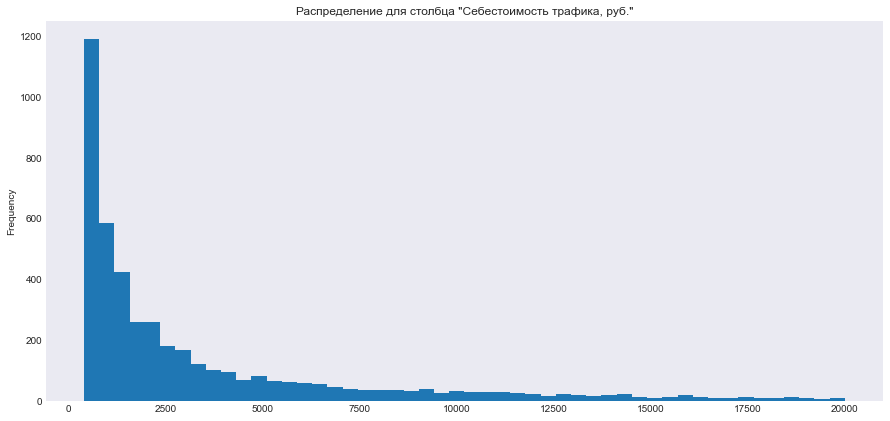

In [32]:
viz_plot('Себестоимость трафика, руб.', (400, 20000))

Анализируя графики распределения, на них представлены отрезки, по которым стоит срезать итоговый датасет, чтобы избавиться от аномалий.

In [33]:
data = data[(data['Начисления, руб.'] >= 0) & 
            (data['Начисления, руб.'] <= 50000) &
            (data['Трафик ПД, Мб'] >= 40000) &
            (data['Трафик ПД, Мб'] <= 2000000) &
            (data['Себестоимость трафика, руб.'] >= 400) &
            (data['Себестоимость трафика, руб.'] <= 20000)
           ]

Проверим, сколько было удалено записей в процессе предобработки данных.

In [34]:
print(1 - data.shape[0] / 5837)

0.22254582833647418


Исходя из полученного числа, можно сделать вывод о том, что данных было удалено немного (учитывая общепринятую норму в 10%, я удалил чуть больше 20%). 

Теперь можем приступать к основной части задания - исследованию данных. Для начала сформируем сводную таблицу, которая отразит затраты, выручку по трафику в разрезе типов устройств.

In [35]:
pivot_data = (data.groupby('Тип устройства').agg({'Начисления, руб.': 'sum'})
                  .merge(data.groupby('Тип устройства').agg({'Себестоимость трафика, руб.': 'sum'}), 
                         on='Тип устройства', 
                         how='left')
             )
pivot_data['Маржинальность, руб.'] = pivot_data['Начисления, руб.'] - pivot_data['Себестоимость трафика, руб.']
pivot_data['Маржинальность, %'] = (pivot_data['Начисления, руб.'] / pivot_data['Себестоимость трафика, руб.'] - 1) * 100
pivot_data

,"Начисления, руб.","Себестоимость трафика, руб.","Маржинальность, руб.","Маржинальность, %"
Тип устройства,,,,
DATA CARD,374593.84,416313.02,-41719.18,-10.02
NETWORK DEVICE,106182.67,172760.75,-66578.08,-38.54
PHONE,1347316.78,1373543.17,-26226.39,-1.91
ROUTER,1803626.12,1837676.95,-34050.83,-1.85
SMARTPHONE,10120869.98,5839692.46,4281177.51,73.31
TABLET,2361402.63,2396823.36,-35420.73,-1.48
UNDEFINED,899732.27,917905.17,-18172.90,-1.98
USB MODEM,2795835.59,2958942.64,-163107.05,-5.51


Маржинальность (маржинальная прибыль/доход) — это разница между выручкой и затратами. В нашем случае, начисления - это выручка, полученная от абонентов, а себестоимость - это затраты на трафик. Таким образом, мы вычли второе из первого и получили маржинальность в разрезе каждого устройства (а поделив второе на первое, получили тоже самое, только в относительном выражении)

Далее визуализируем данные метрики на отдельных графиках. Изображать всё это на одной плоскости не целесообразно, так как масштаб у показателей разный.

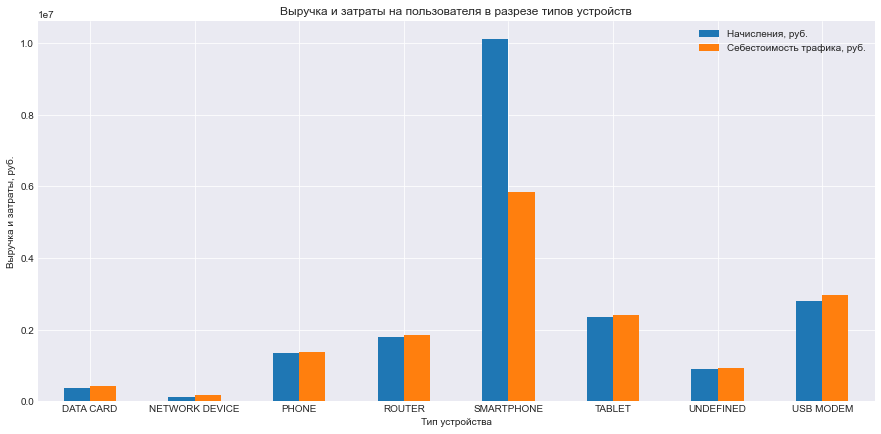

In [36]:
pivot_data[['Начисления, руб.', 'Себестоимость трафика, руб.']].plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Выручка и затраты на пользователя в разрезе типов устройств')
plt.xlabel('Тип устройства')
plt.ylabel('Выручка и затраты, руб.')
plt.xticks(rotation=360)
plt.show()

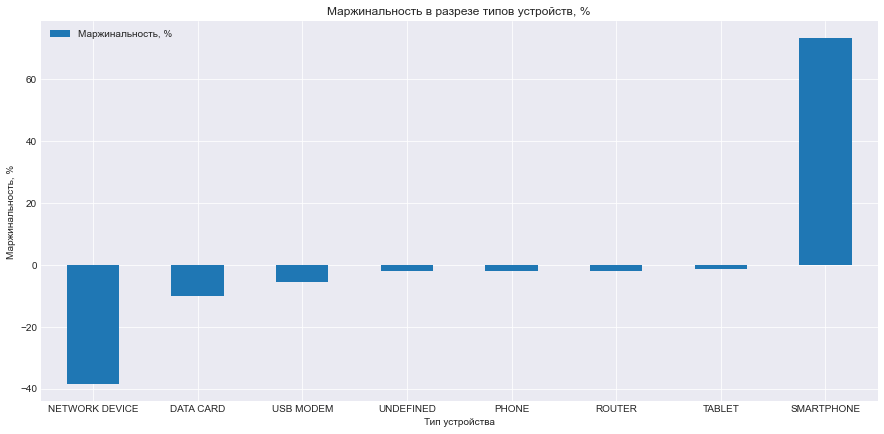

In [37]:
(pivot_data[['Маржинальность, %']].sort_values(by='Маржинальность, %', ascending=True)
                                .plot(kind='bar', figsize=(15, 7), grid=True)
)
plt.title('Маржинальность в разрезе типов устройств, %')
plt.xlabel('Тип устройства')
plt.ylabel('Маржинальность, %')
plt.xticks(rotation=360)
plt.show()

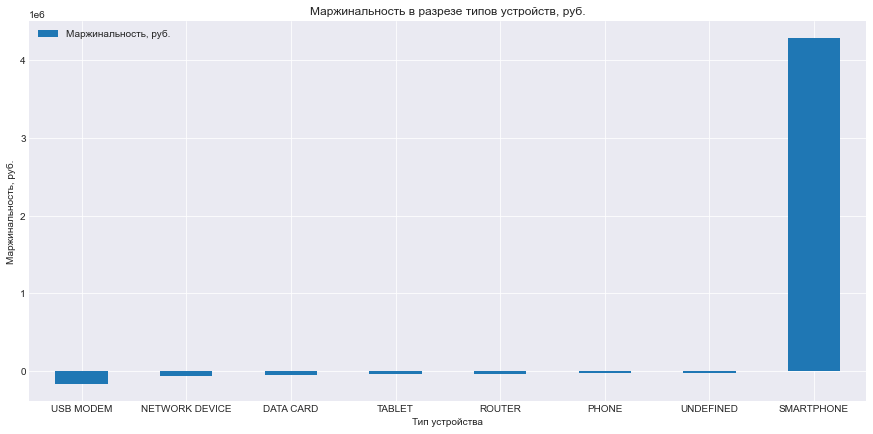

In [38]:
(pivot_data[['Маржинальность, руб.']].sort_values(by='Маржинальность, руб.', ascending=True)
                                   .plot(kind='bar', figsize=(15, 7), grid=True)
)
plt.title('Маржинальность в разрезе типов устройств, руб.')
plt.xlabel('Тип устройства')
plt.ylabel('Маржинальность, руб.')
plt.xticks(rotation=360)
plt.show()

Стоит заметить, что по абсолютным показателям самая низкомаржинальная категория в разрезе типов устройств - `USB MODEM`, а по относительным - `NETWORK DEVICE`. Самая высокомаржинальная и по абсолютным показателям, и по относительным - `SMARTPHONE`. 

## Итоговый вывод по 2 заданию

1. Исходя из того, что себестоимость 1 Мб равна 1 копейке, были посчитаны затраты на трафик, а также маржинальность в разрезе типов устройств. Наибольшая выручка и, соответственно, затраты обнаружены в категории `SMARTPHONE`, наименьший показатель - в `NETWORK DEVICE`.
2. Среди типов устройств наименьшую маржинальность по абсолютным показателям показала категория `USB MODEM`, по относительным - `NETWORK DEVICE`. Самую высокую маржинальность по обоим показателям показала категория `SMARTPHONE`.
3. Также, были визуализированы метрики на графиках (выручка, затраты, GM (валовая прибыль) в абсолютных, а также в относительных показателях. 